In [13]:
import sys
sys.path.append('../bin')
from FitnessExp import *

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
import os
os.chdir('..')

In [5]:
fe = BioTransFitness(tree_version=1,
                                  finetuned=True,
                                  forward_mode=True,
                                  data_folder='data/processed/ncbi_tree_v1',
                                  l1_change=False)

logs/protbert_ft_v1/version_2/checkpoints/epoch=3-step=91.ckpt


In [6]:
fe.run_experiment()

checking saved attention changes
previous saved values found
data/processed/ncbi_tree_v1/rbd_exp_omicron/rbd_exp_attn_ft.pkl
checking saved probabilities
previous saved values found
data/processed/ncbi_tree_v1/rbd_exp_omicron/rbd_exp_forward_prob_ft.pkl
checking saved embedding change
previous saved values found
data/processed/ncbi_tree_v1/rbd_exp_omicron/rbd_exp_l2_change_ft.pkl


In [7]:
list(set(fe.rbd_data['target_name']))

['BA.1', 'WT', 'BA.2']

In [8]:
strains = ['WT','BA.1','BA.2']

results = []
for strain in strains:
    result = get_corr_df(fe.rbd_data,strain)
    results.append(result)

In [9]:
df = pd.concat(results)

In [10]:
# value_pval is null if correlation isn't significant
df[(df['value_pval'].isnull())]

,target_name,Fitness Measure,variable,value,value_pval


In [11]:
strains = ['WT','BA.1','BA.2']

strains_labels = dict(zip(strains,['Reference','BA.1','BA.2']))

df['strain_label'] = df['target_name'].map(strains_labels)

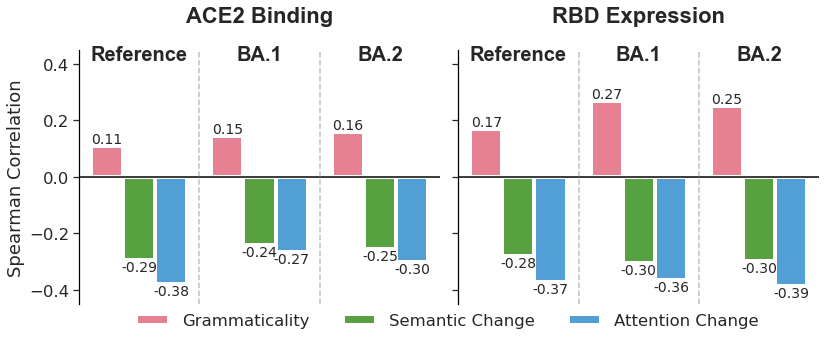

In [12]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 
                 "axes.spines.bottom": False, 
                 'axes.edgecolor':'black'}
palette = sns.color_palette('husl',3)
sns.set_theme(style="ticks", rc=custom_params, font_scale=1.5, font='Dejavu Sans')
g = sns.FacetGrid(df, col='Fitness Measure',  height=5, aspect=1.2,
                  legend_out=True)
g.map_dataframe(sns.barplot,  x='strain_label', y='value', hue='variable',  width=0.8,
             palette=palette,  linewidth=4)
sns.despine(bottom=True)
titles = ['ACE2 Binding', 'RBD Expression']
axes = g.axes
for i, ax in enumerate(axes.flat):
    ax.set_ylabel('Spearman Correlation')
    ax.set_xlabel('')
    ax.set_title(titles[i],y=1.25, pad=-20, verticalalignment="top", 
                 fontweight='bold', fontsize=22).set_fontname('sans-serif')
    #ax.set_fontname('sans-serif')
    ax.xaxis.tick_top()  # Move xtick labels to the top
    ax.xaxis.set_label_position('top')  # Move x-axis label to the top
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, fontweight='bold')
    for label in ax.get_xticklabels():
        label.set_fontname('sans-serif')
    ax.tick_params(axis='x', which='both', pad=-20)
    ax.tick_params(left=True, bottom=False, top=False)
    ax.axhline(y=0, color='black', linestyle='-')
    x_ticks = ax.get_xticks()
    for i, x in enumerate(x_ticks):
        if i == len(x_ticks)-1:
            continue
            print(i)
        x_val = x + .5
        ax.axvline(x=x_val, linestyle='--', color='gray', alpha=0.5)
    for container in ax.containers:
        ax.bar_label(container, fontsize=14, fmt='%.2f')
g.add_legend()
g.set(ylim=(-0.45,0.45))
sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.45, 0.2),
          ncol=3, frameon=False, title='')

plt.subplots_adjust(wspace=0.05)
plt.show()

